<a href="https://colab.research.google.com/github/bmnds/uea-data-science-04-data-processing/blob/main/trabalho-final/Notebook_Trabalho_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho Final

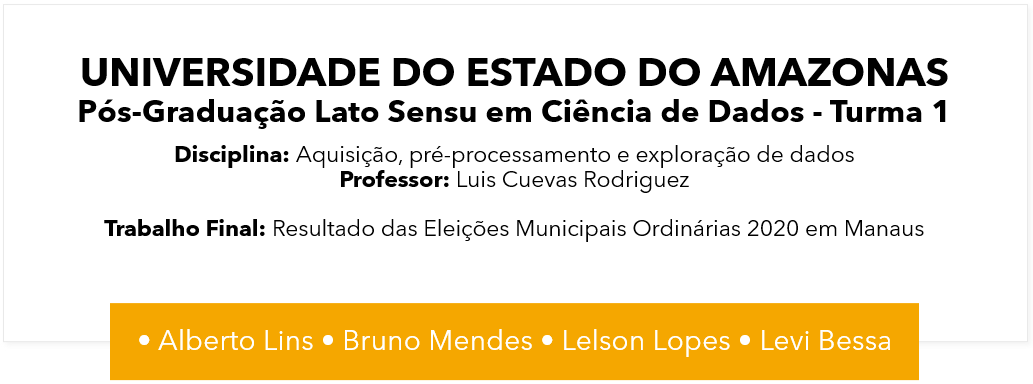

## Definição do trabalho

**Grupo:** Alberto Lins, Bruno Mendes, Lelson Nascimento e Levi Bessa

**Disciplina:** Aquisição, Pré-processamento e Exploração de dados

**Tema escolhido:** Resultado das Eleições Municipais Ordinárias de 2020 em Manaus

### O Trabalho
* I - Definir um tema e os objetivos a serem analisados 
   2. Enumerar algumas questões interessantes para o negócio
* II - Realizar um processo de ETL e de análise dos dados
   3. Coletar dados que vão permitir responder as questões de negócio
   4. Aplicar métodos de pré-processamento e justificar o uso de cada um deles
   5. Explorar os dados para responder as questões de negócio



## Questões


* Qual a inferência no quantitativo de abstenção por bairro ?
* Quais relações entre seções e bairros  na votação de cada candidato ?
* Qual a relação entre as votações de candidatos/partidos e a renda média das pesssoa nos bairros ?
* Qual a relação entre o candidato escolhido e a renda da população a nível de bairro?
* Qual a relação entre o partido escolhido (vereadores e prefeitos) e a média salarial da população a nível de bairro?
* Qual a relação entre o partido do vereador e o partido do prefeito escolhido por zona municipal?
* Qual o atributo mais relevante na escolha do candidato? (renda, densidade populacional, grau de escolaridade, faixa etária)

### Pré-Processamento
* Normalizar e discretizar renda e densidade populacional
* Calcular o grau de escolaridade e a faixa etária predominante da população por bairro

## Datasets

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!curl -o eleicoes2020.tar.gz -s -OL 'https://drive.google.com/uc?export=download&id=1-1v_7xBem5VdYwFFaaNl2EKPLYaDadPa'
!tar -zxvf eleicoes2020.tar.gz
!rm eleicoes2020.tar.gz

datasets/eleicoes.csv
datasets/escolas.csv
datasets/final_bairros.csv
datasets/final_secoes.csv
datasets/leiame-boletim_urna.pdf
datasets/prefeitos_2t.csv
datasets/prefeitos.csv
datasets/resultados_prefeito_2t.csv
datasets/resultados_prefeito.csv
datasets/resultados_vereador.csv
datasets/secoes.csv
datasets/vereadores.csv


In [ ]:
df_p = pd.read_csv('datasets/prefeitos.csv', index_col=0)
df_p.sample(10)

,eleicao,cargo,numero,partido,candidato
7,426,Prefeito,19,PODE,AMAZONINO MENDES
5,426,Prefeito,22,PL,ALFREDO NASCIMENTO
0,426,Prefeito,27,DC,CHICO PRETO
8,426,Prefeito,51,PATRIOTA,CORONEL MENEZES
9,426,Prefeito,13,PT,ZE RICARDO
217,426,Prefeito,65,PC do B,MARCELO AMIL
6,426,Prefeito,10,REPUBLICANOS,CAPITÃO ALBERTO NETO
4,426,Prefeito,55,PSD,RICARDO NICOLAU
3,426,Prefeito,70,AVANTE,DAVID ALMEIDA
10,426,Prefeito,30,NOVO,ROMERO REIS


In [ ]:
df_p2t = pd.read_csv('datasets/prefeitos_2t.csv', index_col=0)
df_p2t.head()

,eleicao,cargo,numero,partido,candidato
1,427,Prefeito,19,PODE,AMAZONINO MENDES
0,427,Prefeito,70,AVANTE,DAVID ALMEIDA


In [ ]:
df_rp = pd.read_csv('datasets/resultados_prefeito.csv', index_col=0)
df_rp.sample(10)

,eleicao,zona,secao,local,cargo,numero,votos
54960,426,2,603,2011,Prefeito,30,31
699136,426,63,735,1783,Prefeito,96,16
829767,426,70,690,1953,Prefeito,30,6
703443,426,63,762,2089,Prefeito,70,75
762213,426,68,487,1821,Prefeito,51,30
287088,426,31,691,2062,Prefeito,22,16
308156,426,32,678,2267,Prefeito,55,50
602578,426,62,322,1945,Prefeito,51,41
404330,426,37,706,2046,Prefeito,70,62
45797,426,2,546,1880,Prefeito,27,5


In [ ]:
df_rp2 = pd.read_csv('datasets/resultados_prefeito_2t.csv', index_col=0)
df_rp2.sample(10)

,eleicao,zona,secao,local,cargo,numero,votos
1041,427,2,555,1899,Prefeito,96,27
7530,427,59,617,2100,Prefeito,95,9
8287,427,62,371,1597,Prefeito,70,154
12389,427,68,767,1970,Prefeito,70,142
5145,427,40,415,1759,Prefeito,95,8
6120,427,58,785,1872,Prefeito,19,153
7508,427,59,612,2283,Prefeito,70,152
986,427,2,534,2011,Prefeito,96,34
6859,427,58,1004,1805,Prefeito,96,22
3033,427,32,717,2305,Prefeito,70,126


In [ ]:
df_rv = pd.read_csv('datasets/resultados_vereador.csv', index_col=0)
df_rv.sample(10)

,eleicao,zona,secao,local,cargo,numero,votos
321595,426,32,760,2054,Vereador,13610,4
566032,426,59,560,2240,Vereador,40663,1
540752,426,58,959,1872,Vereador,18777,1
741335,426,65,524,1686,Vereador,20222,2
58069,426,2,621,1902,Vereador,13013,2
533059,426,58,914,2020,Vereador,19303,2
442002,426,40,504,1686,Vereador,90123,1
515272,426,58,807,1899,Vereador,33011,1
554870,426,59,493,2089,Vereador,13535,1
607447,426,62,350,1945,Vereador,30030,1


In [ ]:
df_v = pd.read_csv('datasets/vereadores.csv', index_col=0)
df_v.sample(10)

,eleicao,cargo,numero,partido,candidato
904,426,Vereador,36999,PTC,RUBENS FERNANDES
8872,426,Vereador,27456,DC,PASTOR CLAUDIO
277,426,Vereador,33444,PMN,VIVALDO DO SINE
3083,426,Vereador,10000,REPUBLICANOS,CABO COUTINHO
2237,426,Vereador,43455,PV,CLEBER PINHEIRO
22407,426,Vereador,23001,CIDADANIA,SILVANO FRAZÃO
991,426,Vereador,40500,PSB,JOAQUIM FELIPE
102,426,Vereador,27300,DC,PR CLEUDOMAR MACIEL
6668,426,Vereador,12888,PDT,PAULO FERREIRA
2506,426,Vereador,40003,PSB,PROF RODRIGO FROES


In [ ]:
df_bairros = pd.read_csv('datasets/final_bairros.csv', index_col=0)
df_bairros.sample(5)

,bairro,zona,area_ha,populacao_2017,densidade_dem_hab_km2,domicilios_particulares,renda_mensal,numero_eleitores_tre_2018,densidade_normalizada,renda_mensal_normalizada,candidato_1st,partido_1st,votos_1st,candidato_2st,partido_2st,votos_2st,candidato_3st,partido_3st,votos_3st,candidato_4st,partido_4st,votos_4st,candidato_1st_2t,partido_1st_2t,votos_1st_2t,candidato_2st_2t,partido_2st_2t,votos_2st_2t
56,VILA DA PRATA,OESTE,66.13,13052,16695.90,2933,1049,7388.0,0.702263,0.043814,AMAZONINO MENDES,PODE,1406,DAVID ALMEIDA,AVANTE,1160,RICARDO NICOLAU,PSD,815,ZE RICARDO,PT,771,AMAZONINO MENDES,PODE,2705,DAVID ALMEIDA,AVANTE,2534
35,PARQUE 10 DE NOVEMBRO,CENTRO-SUL,821.12,48771,5024.36,13433,3112,33024.0,0.209093,0.288768,AMAZONINO MENDES,PODE,5970,DAVID ALMEIDA,AVANTE,4484,ZE RICARDO,PT,3759,CORONEL MENEZES,PATRIOTA,3366,AMAZONINO MENDES,PODE,12710,DAVID ALMEIDA,AVANTE,9914
32,NOVA ESPERANCA,OESTE,147.78,20919,11974.56,5073,1507,10129.0,0.502767,0.098195,AMAZONINO MENDES,PODE,1906,DAVID ALMEIDA,AVANTE,1488,CORONEL MENEZES,PATRIOTA,1155,ZE RICARDO,PT,1010,AMAZONINO MENDES,PODE,3680,DAVID ALMEIDA,AVANTE,3634
2,ALVORADA,CENTRO-OESTE,553.18,76392,11681.73,18193,1171,49752.0,0.490394,0.058300,AMAZONINO MENDES,PODE,8482,DAVID ALMEIDA,AVANTE,8261,CORONEL MENEZES,PATRIOTA,4971,ZE RICARDO,PT,4650,DAVID ALMEIDA,AVANTE,17150,AMAZONINO MENDES,PODE,16413
41,RAIZ,SUL,85.92,16694,16436.22,4061,1293,9382.0,0.691291,0.072786,DAVID ALMEIDA,AVANTE,1720,AMAZONINO MENDES,PODE,1492,ZE RICARDO,PT,903,CORONEL MENEZES,PATRIOTA,793,DAVID ALMEIDA,AVANTE,3325,AMAZONINO MENDES,PODE,3011


## Análise


### Levi


#### Ler dados

In [ ]:
dt_bairros_manaus = df_bairros

def upper_word(word):
    return word.upper()

dt_bairros_manaus['bairro'] = dt_bairros_manaus['bairro'].apply(upper_word)
dt_bairros_manaus['zona'] = dt_bairros_manaus['zona'].apply(upper_word)

dt_bairros_manaus.head()

##### linkar a final_secoes.csv

In [ ]:
dt_final_secoes = pd.read_csv("/content/gdrive/MyDrive/UEA_POS_CD/modulo4/trabalho-final/datasets/csv/final_secoes.csv",sep=',',index_col=0)
dt_final_secoes.head()

#### Funções de Limpeza de dados
* Padronizar nome dos Bairros.

In [ ]:
"""
CORRIGI GRAMÁTICA DOS ERROS ENCONTRADOS NOS NOMES DOS BAIRROS 
"""
def corrigir_nome_bairro(nome):
    if nome == 'ADRIANOPOLIS':
        return 'ADRIANÓPOLIS'
    if nome == 'BETANIA':
        return 'BETÂNIA'
    if nome == 'COLONIA ANTONIO ALEIXO':
        return 'COLÔNIA ANTÔNIO ALEIXO'
    if nome == 'COLONIA OLIVEIRA MACHADO':
        return 'COLÔNIA OLIVEIRA MACHADO'
    if nome == 'COLONIA SANTO ANTONIO':
        return 'COLÔNIA SANTO ANTÔNIO'
    if nome == 'COLONIA TERRA NOVA':
        return 'COLÔNIA TERRA NOVA'
    if nome == 'GLORIA':
        return 'GLÓRIA'
    if nome == 'LIRIO DO VALE':
        return 'LÍRIO DO VALE'
    if nome == 'NOVA ESPERANCA':
        return 'NOVA ESPERANÇA'
    if nome == 'PETROPOLIS':
        return 'PETRÓPOLIS'
    if nome == 'PAZ':
        return 'DA PAZ'
    if nome == 'PRACA 14 DE JANEIRO':
        return 'PRAÇA 14 DE JANEIRO'
    if nome == 'REDENCAO':
        return 'REDENÇÃO'
    if nome == 'SANTO ANTONIO':
        return 'SANTO ANTÔNIO'
    if nome == 'SAO FRANCISCO':
        return 'SÃO FRANCISCO'
    if nome == 'SAO GERALDO':
        return 'SÃO GERALDO'
    if nome == 'SAO JORGE':
        return 'SÃO JORGE'
    if nome == 'SAO JOSE OPERARIO':
        return 'SÃO JOSÉ OPERÁRIO'
    if nome == 'SAO LAZARO':
        return 'SÃO LÁZARO'
    if nome == 'SAO RAIMUNDO':
        return 'SÃO RAIMUNDO'
    if nome == 'TARUMA':
        return 'TARUMÃ'
    if nome == 'TARUMÃ AÇU':
        return 'TARUMÃ-AÇU'
    else :
        return nome

In [ ]:
# APLICANDO CORREÇÃO NOS NOMES EM AMBOS DATASETS
dt_bairros_manaus['bairro'] = dt_bairros_manaus['bairro'].apply(corrigir_nome_bairro)
dt_final_secoes['bairro'] = dt_final_secoes['bairro'].apply(corrigir_nome_bairro)

bairros = np.unique(dt_final_secoes['bairro'])

#### Qual a inferência no quantitativo de abstenção por bairro ?
> Analisar porcentagem de abstenção de votos baseado em votos aptos, não pela população total.

In [ ]:
# nome_bairro , qt_secao , qt_aptos , qt_votos, prct_abst 
def cont_secao_bairro(bairro):
  return dt_final_secoes.loc[dt_final_secoes['bairro']==bairro].shape[0]
def cont_aptos_bairro(bairro):
  aux = dt_final_secoes.loc[dt_final_secoes['bairro']==bairro]
  return aux['aptos'].sum()
def cont_votos_bairro(bairro):
  aux = dt_final_secoes.loc[dt_final_secoes['bairro']==bairro]
  return aux['votos'].sum()

dt = [pd.Series([x,cont_secao_bairro(x),cont_aptos_bairro(x),cont_votos_bairro(x)]) for x in dt_bairros_manaus['bairro']]
dt = pd.DataFrame(dt)
dt.columns=['bairro','qt_secao','vt_aptos','vt_validados']
dt['pct_abstencao'] = round(((dt['vt_aptos']- dt['vt_validados'])/dt['vt_aptos'])*100)
dt = dt.sort_values(by='vt_aptos',ascending=False,ignore_index=True)
dt.fillna(0,inplace=True)
dt

,bairro,qt_secao,vt_aptos,vt_validados,pct_abstencao
0,CIDADE NOVA,272,109416,88614,19.0
1,JORGE TEIXEIRA,190,75073,61464,18.0
2,NOVO ALEIXO,180,69080,56507,18.0
3,SÃO JOSÉ OPERÁRIO,151,61195,51538,16.0
4,COMPENSA,141,57535,48091,16.0
...,...,...,...,...,...
58,TARUMÃ-AÇU,7,2336,1821,22.0
59,VILA BURITI,2,685,462,33.0
60,PONTA NEGRA,0,0,0,0.0
61,DISTRITO INDUSTRIAL I,0,0,0,0.0


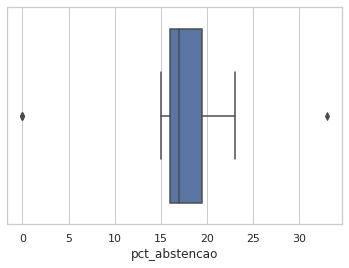

In [ ]:
import seaborn as sns
ax = sns.boxplot(x=dt['pct_abstencao'])

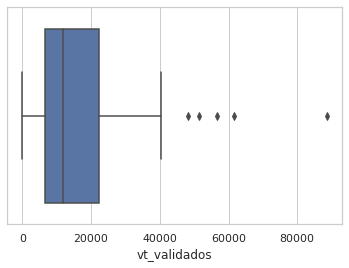

In [ ]:
ax = sns.boxplot(x=dt["vt_validados"])

#### Quais relações entre seções e bairros na votação de cada candidato ?
> Identificar os Candidatos mais votados por seções , e seus respectivos bairros.

In [ ]:
candidatos = np.unique([dt_final_secoes['candidato_1st'],dt_final_secoes['candidato_2nd'],dt_final_secoes['candidato_3rd'],dt_final_secoes['candidato_4th']])

In [ ]:
df = pd.DataFrame()
for candidato in candidatos:
  # candidato mais votado
  df_aux = dt_final_secoes['candidato_1st'].loc[dt_final_secoes['candidato_1st'] == candidato]
  # bairros mais assíduo (bairro_top) , bairros 
  df_aux2 = [len(np.unique(dt_final_secoes['bairro'].loc[dt_final_secoes['candidato_1st'] == candidato])),
             dt_final_secoes['bairro'].loc[dt_final_secoes['candidato_1st'] == candidato].describe().top,
             list(dt_final_secoes['bairro'].loc[dt_final_secoes['candidato_1st'] == candidato])]

  # candidato,quant_sec_1st,quant_br_1st,bairro_top,bairros
  frame = pd.Series([candidato,df_aux.shape[0],df_aux2[0],df_aux2[1],df_aux2[2]])
  
  df = pd.concat([df,frame],axis=1,ignore_index=True)

df = df.T
df.columns = ['candidato','quant_sec_1st','quant_br_1st','bairro_top_1st','bairros_1st']


In [ ]:
"""Adicionando 0 a campos vazios""" 
df.fillna(0,inplace=True)
df = df.sort_values(by='quant_sec_1st',ascending=False,ignore_index=True)
df.drop(columns=['bairros_1st'])

,candidato,quant_sec_1st,quant_br_1st,bairro_top_1st
0,AMAZONINO MENDES,2016,57,CIDADE NOVA
1,DAVID ALMEIDA,1298,54,JORGE TEIXEIRA
2,ZE RICARDO,40,15,CIDADE NOVA
3,RICARDO NICOLAU,8,4,SÃO RAIMUNDO
4,CORONEL MENEZES,7,5,JAPIIM
5,CAPITÃO ALBERTO NETO,1,1,SÃO GERALDO
6,ALFREDO NASCIMENTO,0,0,0
7,ROMERO REIS,0,0,0


### Lelson


#### Qual a relação entre as votações de candidatos/partidos e a renda média das pessoa nos bairros ?


In [ ]:
df_bairros = pd.read_csv('/content/final_bairros.csv')


In [ ]:
df_bairros.head(5)

,Unnamed: 0,bairro,zona,area_ha,populacao_2017,densidade_dem_hab_km2,domicilios_particulares,renda_mensal,numero_eleitores_tre_2018,densidade_normalizada,renda_mensal_normalizada,candidato_1st,partido_1st,votos_1st,candidato_2st,partido_2st,votos_2st,candidato_3st,partido_3st,votos_3st,candidato_4st,partido_4st,votos_4st,candidato_1st_2t,partido_1st_2t,votos_1st_2t,candidato_2st_2t,partido_2st_2t,votos_2st_2t,candidato_1st_vereador,partido_1st_vereador,votos_1st_vereador
0,0,ADRIANOPOLIS,CENTRO-SUL,248.45,10459,3560.88,3224,4824,8709.0,0.147255,0.492045,AMAZONINO MENDES,PODE,1513,DAVID ALMEIDA,AVANTE,993,CORONEL MENEZES,PATRIOTA,900,RICARDO NICOLAU,PSD,840,AMAZONINO MENDES,PODE,3424,DAVID ALMEIDA,AVANTE,2266,AMOM,PODE,156
1,1,ALEIXO,CENTRO-SUL,618.34,24417,3340.40,6101,4930,16725.0,0.137939,0.504631,AMAZONINO MENDES,PODE,2723,DAVID ALMEIDA,AVANTE,2294,RICARDO NICOLAU,PSD,1752,ZE RICARDO,PT,1681,AMAZONINO MENDES,PODE,6012,DAVID ALMEIDA,AVANTE,5138,MAURO MOTO TÁXI,PSC,1073
2,2,ALVORADA,CENTRO-OESTE,553.18,76392,11681.73,18193,1171,49752.0,0.490394,0.058300,AMAZONINO MENDES,PODE,8482,DAVID ALMEIDA,AVANTE,8261,CORONEL MENEZES,PATRIOTA,4971,ZE RICARDO,PT,4650,DAVID ALMEIDA,AVANTE,17150,AMAZONINO MENDES,PODE,16413,SANDRO MAIA,DEM,2649
3,3,ARMANDO MENDES,LESTE,307.65,33441,9194.86,7402,802,19342.0,0.385314,0.014486,AMAZONINO MENDES,PODE,4069,DAVID ALMEIDA,AVANTE,3186,RICARDO NICOLAU,PSD,1962,ZE RICARDO,PT,1666,DAVID ALMEIDA,AVANTE,6992,AMAZONINO MENDES,PODE,6986,JOSIMAR GADELHA,CIDADANIA,710
4,4,BETANIA,SUL,52.51,12940,20845.55,3119,1028,8391.0,0.877603,0.041320,DAVID ALMEIDA,AVANTE,2326,AMAZONINO MENDES,PODE,1192,ZE RICARDO,PT,813,CORONEL MENEZES,PATRIOTA,740,DAVID ALMEIDA,AVANTE,3922,AMAZONINO MENDES,PODE,2314,CHIQUINHO AMARAL,PSC,263


In [ ]:
df_bairros_renda = df_bairros.sort_values('renda_mensal', ascending=False)
df_bairros_renda = df_bairros_renda[['bairro', 'zona', 'renda_mensal', 'candidato_1st', 'votos_1st',	'candidato_2st', 	'votos_2st']]
df_bairros_renda = df_bairros_renda.head(5)
df_bairros_renda

,bairro,zona,renda_mensal,candidato_1st,votos_1st,candidato_2st,votos_2st
1,ALEIXO,CENTRO-SUL,4930,AMAZONINO MENDES,2723,DAVID ALMEIDA,2294
0,ADRIANOPOLIS,CENTRO-SUL,4824,AMAZONINO MENDES,1513,DAVID ALMEIDA,993
30,NOSSA SENHORA DAS GRACAS,CENTRO-SUL,3707,AMAZONINO MENDES,2106,DAVID ALMEIDA,1325
35,PARQUE 10 DE NOVEMBRO,CENTRO-SUL,3112,AMAZONINO MENDES,5970,DAVID ALMEIDA,4484
7,CHAPADA,CENTRO-SUL,3096,AMAZONINO MENDES,858,DAVID ALMEIDA,597


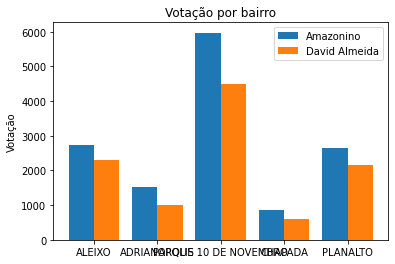

In [ ]:


import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = df_bairros_renda['bairro']
cand1 = df_bairros_renda['votos_1st']
cand2 = df_bairros_renda['votos_2st']


x = np.arange(len(labels))  # the label locations
width = 0.40  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width / 2 , cand1, width, label='Amazonino')
rects2 = ax.bar(x + width / 2 , cand2, width, label='David Almeida')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Votação')
ax.set_title('Votação por bairro')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()



#### Qual a relação entre o candidato escolhido e a renda da população a nível de bairro?


In [ ]:
df_bairros_renda_menos = df_bairros.sort_values('renda_mensal', ascending=True)
df_bairros_renda_menos = df_bairros_renda_menos[['bairro', 'zona', 'renda_mensal', 'candidato_1st', 'votos_1st',	'candidato_2st', 	'votos_2st']]
df_bairros_renda_menos = df_bairros_renda_menos.head(5)

df_bairros_renda = df_bairros_renda.append(df_bairros_renda_menos)
df_bairros_renda

,bairro,zona,renda_mensal,candidato_1st,votos_1st,candidato_2st,votos_2st
1,ALEIXO,CENTRO-SUL,4930,AMAZONINO MENDES,2723,DAVID ALMEIDA,2294
0,ADRIANOPOLIS,CENTRO-SUL,4824,AMAZONINO MENDES,1513,DAVID ALMEIDA,993
30,NOSSA SENHORA DAS GRACAS,CENTRO-SUL,3707,AMAZONINO MENDES,2106,DAVID ALMEIDA,1325
35,PARQUE 10 DE NOVEMBRO,CENTRO-SUL,3112,AMAZONINO MENDES,5970,DAVID ALMEIDA,4484
7,CHAPADA,CENTRO-SUL,3096,AMAZONINO MENDES,858,DAVID ALMEIDA,597
40,PURAQUEQUARA,LESTE,680,AMAZONINO MENDES,846,DAVID ALMEIDA,834
53,TANCREDO NEVES,LESTE,700,AMAZONINO MENDES,6137,DAVID ALMEIDA,5815
10,COLONIA ANTONIO ALEIXO,LESTE,714,DAVID ALMEIDA,3041,AMAZONINO MENDES,1880
57,ZUMBI DOS PALMARES,LESTE,725,DAVID ALMEIDA,5004,AMAZONINO MENDES,4737
23,JORGE TEIXEIRA,LESTE,726,DAVID ALMEIDA,12751,AMAZONINO MENDES,12233


In [ ]:
df_bairros_renda_2t = df_bairros.sort_values('renda_mensal', ascending=False)
df_bairros_renda_2t = df_bairros_renda_2t[['bairro', 'zona', 'renda_mensal', 'candidato_1st_2t', 'votos_1st_2t',	'candidato_2st_2t', 	'votos_2st_2t']]

df_bairros_renda_menos_2t = df_bairros.sort_values('renda_mensal', ascending=True)
df_bairros_renda_menos_2t = df_bairros_renda_menos_2t[['bairro', 'zona', 'renda_mensal', 'candidato_1st_2t', 'votos_1st_2t',	'candidato_2st_2t', 	'votos_2st_2t']]
df_bairros_renda_menos_2t = df_bairros_renda_menos_2t.head(5)

df_bairros_renda_2t = df_bairros_renda_2t.append(df_bairros_renda_menos_2t)
df_bairros_renda_2t

,bairro,zona,renda_mensal,candidato_1st_2t,votos_1st_2t,candidato_2st_2t,votos_2st_2t
1,ALEIXO,CENTRO-SUL,4930,AMAZONINO MENDES,6012,DAVID ALMEIDA,5138
0,ADRIANOPOLIS,CENTRO-SUL,4824,AMAZONINO MENDES,3424,DAVID ALMEIDA,2266
30,NOSSA SENHORA DAS GRACAS,CENTRO-SUL,3707,AMAZONINO MENDES,4456,DAVID ALMEIDA,3063
35,PARQUE 10 DE NOVEMBRO,CENTRO-SUL,3112,AMAZONINO MENDES,12710,DAVID ALMEIDA,9914
7,CHAPADA,CENTRO-SUL,3096,AMAZONINO MENDES,1749,DAVID ALMEIDA,1332
...,...,...,...,...,...,...,...
40,PURAQUEQUARA,LESTE,680,AMAZONINO MENDES,1739,DAVID ALMEIDA,1626
53,TANCREDO NEVES,LESTE,700,DAVID ALMEIDA,13519,AMAZONINO MENDES,11132
10,COLONIA ANTONIO ALEIXO,LESTE,714,DAVID ALMEIDA,4638,AMAZONINO MENDES,3608
57,ZUMBI DOS PALMARES,LESTE,725,DAVID ALMEIDA,9724,AMAZONINO MENDES,9344


In [ ]:
df_bairros[['bairro', 'zona', 'renda_mensal', 'candidato_1st', 'votos_1st',	'candidato_2st', 	'votos_2st', 'candidato_1st_2t', 'votos_1st_2t',	'candidato_2st_2t', 	'votos_2st_2t']].sort_values('renda_mensal', ascending=False)

,bairro,zona,renda_mensal,candidato_1st,votos_1st,candidato_2st,votos_2st,candidato_1st_2t,votos_1st_2t,candidato_2st_2t,votos_2st_2t
1,ALEIXO,CENTRO-SUL,4930,AMAZONINO MENDES,2723,DAVID ALMEIDA,2294,AMAZONINO MENDES,6012,DAVID ALMEIDA,5138
0,ADRIANOPOLIS,CENTRO-SUL,4824,AMAZONINO MENDES,1513,DAVID ALMEIDA,993,AMAZONINO MENDES,3424,DAVID ALMEIDA,2266
30,NOSSA SENHORA DAS GRACAS,CENTRO-SUL,3707,AMAZONINO MENDES,2106,DAVID ALMEIDA,1325,AMAZONINO MENDES,4456,DAVID ALMEIDA,3063
35,PARQUE 10 DE NOVEMBRO,CENTRO-SUL,3112,AMAZONINO MENDES,5970,DAVID ALMEIDA,4484,AMAZONINO MENDES,12710,DAVID ALMEIDA,9914
7,CHAPADA,CENTRO-SUL,3096,AMAZONINO MENDES,858,DAVID ALMEIDA,597,AMAZONINO MENDES,1749,DAVID ALMEIDA,1332
37,PLANALTO,CENTRO-OESTE,2500,AMAZONINO MENDES,2660,DAVID ALMEIDA,2142,AMAZONINO MENDES,5354,DAVID ALMEIDA,4769
17,DOM PEDRO,CENTRO-OESTE,2456,AMAZONINO MENDES,3837,DAVID ALMEIDA,3002,AMAZONINO MENDES,7936,DAVID ALMEIDA,6495
55,VILA BURITI,SUL,2430,CORONEL MENEZES,127,DAVID ALMEIDA,59,DAVID ALMEIDA,228,AMAZONINO MENDES,105
19,FLORES,CENTRO-SUL,2357,AMAZONINO MENDES,4316,DAVID ALMEIDA,4190,DAVID ALMEIDA,9070,AMAZONINO MENDES,8948
6,CENTRO,SUL,1927,AMAZONINO MENDES,5563,DAVID ALMEIDA,3886,AMAZONINO MENDES,11076,DAVID ALMEIDA,8756


#### Qual a relação entre o partido escolhido (vereadores e prefeitos) e a média salarial da população a nível de bairro?


In [ ]:
df_bairros[['bairro', 'zona', 'renda_mensal', 'partido_1st', 'partido_1st_vereador']].sort_values('renda_mensal', ascending=False)

,bairro,zona,renda_mensal,partido_1st,partido_1st_vereador
1,ALEIXO,CENTRO-SUL,4930,PODE,PSC
0,ADRIANOPOLIS,CENTRO-SUL,4824,PODE,PODE
34,PARQUE 10 DE NOVEMBRO,CENTRO-SUL,3112,PODE,DEM
7,CHAPADA,CENTRO-SUL,3096,PODE,PSB
36,PLANALTO,CENTRO-OESTE,2500,PODE,PSC
17,DOM PEDRO,CENTRO-OESTE,2456,PODE,DEM
54,VILA BURITI,SUL,2430,PATRIOTA,PDT
19,FLORES,CENTRO-SUL,2357,PODE,DEM
6,CENTRO,SUL,1927,PODE,REPUBLICANOS
47,SAO GERALDO,CENTRO-SUL,1898,PODE,REPUBLICANOS


#### Qual a relação entre o partido do vereador e o partido do prefeito escolhido por zona municipal?

In [ ]:
df_bairros[['bairro', 'zona', 'renda_mensal', 'partido_1st', 'partido_1st_vereador']].sort_values('zona', ascending=False)

,bairro,zona,renda_mensal,partido_1st,partido_1st_vereador
28,MORRO DA LIBERDADE,SUL,931,AVANTE,PATRIOTA
16,CRESPO,SUL,908,AVANTE,PTB
37,PRACA 14 DE JANEIRO,SUL,1283,PODE,PSB
35,PETROPOLIS,SUL,1094,AVANTE,PODE
43,SANTA LUZIA,SUL,1075,AVANTE,PATRIOTA
29,NOSSA SENHORA APARECIDA,SUL,1764,PODE,AVANTE
46,SAO FRANCISCO,SUL,1385,PODE,PSDB
22,JAPIIM,SUL,1418,PODE,CIDADANIA
40,RAIZ,SUL,1293,AVANTE,MDB
18,EDUCANDOS,SUL,907,AVANTE,PV


### Alberto

#### Qual atributo mais relevante na escolha de um candidato ? (renda, densidade populacional,grau de escolaridade, faixa etária)

In [ ]:
df_secoes = pd.read_csv('datasets/final_secoes.csv', index_col=0)
df_secoes.sample(5)

,zona,secao,local,nome,bairro,lat,long,aptos,votos,abstencoes,votos_2t,abstencoes_2t,masculino,feminino,jovem,adulto,idoso,casado,divorciado,separado,solteiro,viuvo,analfabeto,le_e_escreve,ensino_fundamental,ensino_medio,ensino_superior,votos_1st,candidato_1st,partido_1st,votos_2nd,candidato_2nd,partido_2nd,votos_3rd,candidato_3rd,partido_3rd,votos_4th,candidato_4th,partido_4th,partido_1st_ver,votos_1st_ver,partido_2nd_ver,votos_2nd_ver,partido_3rd_ver,votos_3rd_ver,partido_4th_ver,votos_4th_ver,votos_2t_1st,candidato_2t_1st,partido_2t_1st,votos_2t_2nd,candidato_2t_2nd,partido_2t_2nd
916,32,885,2216,E. E. CORONEL PEDRO CÂMARA (QUARENTÃO),COMPENSA,-3.104240,-60.063591,356,299,57,263,93,2.0,2.0,2.0,4.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,3.0,1.0,2.0,3.0,87,DAVID ALMEIDA,AVANTE,70,AMAZONINO MENDES,PODE,33,RICARDO NICOLAU,PSD,33,ZE RICARDO,PT,PATRIOTA,27,PSDB,26,PSC,18,AVANTE,16,123,AMAZONINO MENDES,PODE,123,DAVID ALMEIDA,AVANTE
2956,68,552,1783,E. M. DR. PAULO PINTO NERY,JORGE TEIXEIRA,-3.036281,-59.931913,409,361,48,345,64,6.0,1.0,1.0,6.0,2.0,1.0,1.0,2.0,6.0,1.0,1.0,1.0,6.0,2.0,4.0,89,AMAZONINO MENDES,PODE,70,DAVID ALMEIDA,AVANTE,47,ZE RICARDO,PT,45,RICARDO NICOLAU,PSD,SOLIDARIEDADE,32,AVANTE,30,PATRIOTA,24,PSC,22,166,DAVID ALMEIDA,AVANTE,151,AMAZONINO MENDES,PODE
428,2,739,2046,CENTRO UNIVERSITÁRIO NILTON LINS,FLORES,-3.058218,-60.006380,349,237,112,222,127,2.0,2.0,NaN,2.0,1.0,1.0,1.0,NaN,2.0,1.0,1.0,1.0,2.0,1.0,2.0,51,AMAZONINO MENDES,PODE,42,DAVID ALMEIDA,AVANTE,28,CORONEL MENEZES,PATRIOTA,26,RICARDO NICOLAU,PSD,DC,22,AVANTE,16,PODE,12,PSB,12,111,AMAZONINO MENDES,PODE,90,DAVID ALMEIDA,AVANTE
487,31,574,2054,CMEI PE. LUIS RUAS,MAUAZINHO,-3.126884,-59.937107,360,309,51,296,64,7.0,2.0,NaN,7.0,1.0,1.0,2.0,1.0,7.0,1.0,1.0,1.0,6.0,7.0,1.0,68,DAVID ALMEIDA,AVANTE,57,AMAZONINO MENDES,PODE,50,ZE RICARDO,PT,38,RICARDO NICOLAU,PSD,PSC,53,PTC,34,CIDADANIA,21,PRTB,18,153,DAVID ALMEIDA,AVANTE,110,AMAZONINO MENDES,PODE
1617,58,886,2070,E. M. LUCILA FREITAS,COLONIA SANTO ANTONIO,-3.039705,-59.985604,392,325,67,315,77,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,8.0,69,DAVID ALMEIDA,AVANTE,56,ZE RICARDO,PT,55,AMAZONINO MENDES,PODE,35,RICARDO NICOLAU,PSD,CIDADANIA,38,AVANTE,29,PSB,19,PSC,16,163,DAVID ALMEIDA,AVANTE,117,AMAZONINO MENDES,PODE


##### Agrupamento (bairro)

In [ ]:
df = df_secoes[['bairro', 'jovem', 'adulto', 'idoso', 
                'analfabeto', 'le_e_escreve', 'ensino_fundamental', 'ensino_medio', 'ensino_superior']] \
                .groupby('bairro').sum().reset_index()
df.sample(5)

,bairro,jovem,adulto,idoso,analfabeto,le_e_escreve,ensino_fundamental,ensino_medio,ensino_superior
35,NOVO ISRAEL,54.0,126.0,66.0,47.0,55.0,85.0,85.0,83.0
32,NOVA CIDADE,171.0,354.0,146.0,93.0,124.0,184.0,236.0,214.0
36,PARQUE 10 DE NOVEMBRO,96.0,233.0,100.0,46.0,75.0,96.0,204.0,277.0
12,COLONIA OLIVEIRA MACHADO,8.0,34.0,15.0,13.0,16.0,28.0,58.0,23.0
24,JORGE TEIXEIRA,267.0,703.0,258.0,200.0,231.0,386.0,438.0,330.0


##### Normalização

In [ ]:
def normalizar_valores_coluna(df, col):
  min = df[col].min()
  max = df[col].max()
  df[col] = (df[col] - min) / (max - min)

for col in ['jovem',	'adulto',	'idoso',	'analfabeto',	'le_e_escreve',	
            'ensino_fundamental',	'ensino_medio',	'ensino_superior']:
  normalizar_valores_coluna(df, col)

df.sample(5)

,bairro,jovem,adulto,idoso,analfabeto,le_e_escreve,ensino_fundamental,ensino_medio,ensino_superior
56,TARUMA,0.234097,0.275735,0.245014,0.338912,0.281250,0.330296,0.416,0.282847
9,CIDADE DE DEUS,0.305344,0.341912,0.344729,0.380753,0.354167,0.359909,0.342,0.255474
19,EDUCANDOS,0.048346,0.132353,0.131054,0.150628,0.111111,0.118451,0.254,0.120438
58,VILA BURITI,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000
30,NOSSA SENHORA APARECIDA,0.002545,0.044118,0.045584,0.050209,0.038194,0.029613,0.092,0.071168


##### Junção

In [ ]:
df_bairros = pd.read_csv('datasets/final_bairros.csv', delimiter=',', index_col=0)
df_bairros.columns

Index(['bairro', 'zona', 'area_ha', 'populacao_2017', 'densidade_dem_hab_km2',
       'domicilios_particulares', 'renda_mensal', 'numero_eleitores_tre_2018',
       'densidade_normalizada', 'renda_mensal_normalizada', 'candidato_1st',
       'partido_1st', 'votos_1st', 'candidato_2st', 'partido_2st', 'votos_2st',
       'candidato_3st', 'partido_3st', 'votos_3st', 'candidato_4st',
       'partido_4st', 'votos_4st', 'candidato_1st_2t', 'partido_1st_2t',
       'votos_1st_2t', 'candidato_2st_2t', 'partido_2st_2t', 'votos_2st_2t'],
      dtype='object')

In [ ]:
df = df.merge(df_bairros[['bairro', 'densidade_normalizada', 'renda_mensal_normalizada', 
                          'candidato_1st', 'candidato_1st_2t']].copy())
df.sample(5)

,bairro,jovem,adulto,idoso,analfabeto,le_e_escreve,ensino_fundamental,ensino_medio,ensino_superior,densidade_normalizada,renda_mensal_normalizada,candidato_1st,candidato_1st_2t
51,SAO RAIMUNDO,0.068702,0.063725,0.096866,0.087866,0.083333,0.063781,0.086,0.071168,0.575274,0.054025,AMAZONINO MENDES,AMAZONINO MENDES
11,COLONIA OLIVEIRA MACHADO,0.017812,0.037990,0.037037,0.054393,0.048611,0.054670,0.106,0.031022,0.253499,0.030753,AMAZONINO MENDES,AMAZONINO MENDES
34,PARQUE 10 DE NOVEMBRO,0.241730,0.281863,0.279202,0.192469,0.253472,0.209567,0.398,0.494526,0.209093,0.288768,AMAZONINO MENDES,AMAZONINO MENDES
22,JAPIIM,0.330789,0.330882,0.376068,0.347280,0.368056,0.355353,0.536,0.379562,0.408586,0.087628,AMAZONINO MENDES,DAVID ALMEIDA
6,CENTRO,0.201018,0.241422,0.301994,0.200837,0.284722,0.218679,0.446,0.339416,0.325204,0.148065,AMAZONINO MENDES,AMAZONINO MENDES


##### Discretização

In [ ]:
def discretizar_prefeitos(prefeito):
  if (prefeito == 'AMAZONINO MENDES'):
    return 0
  elif (prefeito == 'DAVID ALMEIDA'):
    return 1
  else:
    return 2

def discretizar_valores_coluna(df, col, f):
  df[col] = df.apply(lambda row: f(row[col]), axis=1)

discretizar_valores_coluna(df, 'candidato_1st', discretizar_prefeitos)
discretizar_valores_coluna(df, 'candidato_1st_2t', discretizar_prefeitos)
df.columns = ['bairro', 'jovem',	'adulto',	'idoso',	'analfabeto',	'le_e_escreve',	
            'ensino_fundamental',	'ensino_medio',	'ensino_superior', 
            'densidade', 'renda', 'candidato', 'candidato_2t']
df.sample(5)

,bairro,jovem,adulto,idoso,analfabeto,le_e_escreve,ensino_fundamental,ensino_medio,ensino_superior,densidade,renda,candidato,candidato_2t
28,MORRO DA LIBERDADE,0.033079,0.055147,0.111111,0.108787,0.086806,0.075171,0.174,0.118613,0.701857,0.029803,1,1
37,PRACA 14 DE JANEIRO,0.027990,0.063725,0.065527,0.054393,0.062500,0.054670,0.138,0.074818,0.428430,0.071598,0,0
2,ALVORADA,0.422392,0.459559,0.444444,0.464435,0.454861,0.451025,0.490,0.434307,0.490394,0.058300,0,1
30,NOVA CIDADE,0.432570,0.430147,0.410256,0.389121,0.423611,0.410023,0.462,0.379562,0.237806,0.053313,0,1
36,PLANALTO,0.111959,0.122549,0.150997,0.117155,0.131944,0.091116,0.118,0.171533,0.157090,0.216101,0,0


##### Descoberta do atributo mais relevante

Foi realizada a transformação dos dados para verificar qual atributo é mais relevante na escolha do candidato, e os dados mostraram que a densidade demográfica possui maior influência na escolha do candidato, é sabido também que a segunda opção que é a renda, é respondida em sua maior parte, por pessoas de baixa renda, logo deve ser desprezada.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

if 'bairro' in df.columns:
  df = df.drop(columns='bairro')

df.sample(5)

,jovem,adulto,idoso,analfabeto,le_e_escreve,ensino_fundamental,ensino_medio,ensino_superior,densidade,renda,candidato,candidato_2t
27,0.132316,0.212010,0.213675,0.255230,0.215278,0.266515,0.364,0.239051,0.419019,0.007480,0,1
34,0.241730,0.281863,0.279202,0.192469,0.253472,0.209567,0.398,0.494526,0.209093,0.288768,0,0
4,0.048346,0.078431,0.074074,0.100418,0.076389,0.059226,0.110,0.074818,0.877603,0.041320,1,1
10,0.073791,0.117647,0.102564,0.117155,0.100694,0.138952,0.226,0.069343,0.072728,0.004037,1,1
23,0.676845,0.857843,0.729345,0.836820,0.795139,0.870159,0.866,0.591241,0.303097,0.005462,1,1


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, mutual_info_classif, chi2

def select_features(c, fun):
  print(f'Analyzing {c}({fun})')
  test = c(score_func=fun, k='all')
  fit = test.fit(X, Y)

  np.set_printoptions(precision=3)

  features = fit.transform(X)
  
  print("Features sorted by their scores:")
  print(sorted(zip(map(lambda x: round(x, 4), fit.scores_), 
                  df.columns), 
              reverse=True))
  print('')
  feature_importance = fit.scores_
  feature_importance = 100.0 * (feature_importance / feature_importance.max())
  sorted_idx = np.argsort(feature_importance)
  pos = np.arange(sorted_idx.shape[0]) + 0.5
  plt.subplot(1,2,2)
  plt.barh(pos, feature_importance[sorted_idx], align='center')
  m_name = np.array(df.columns)
  plt.yticks(pos, m_name[sorted_idx])
  plt.xlabel('Importância Relativa')
  plt.show()

Análise para o 1o turno

Analyzing <class 'sklearn.feature_selection._univariate_selection.SelectKBest'>(<function chi2 at 0x7f6ae327abf8>)
Features sorted by their scores:
[(1.1957, 'densidade'), (0.8146, 'renda'), (0.3475, 'ensino_medio'), (0.2941, 'analfabeto'), (0.2809, 'ensino_fundamental'), (0.2496, 'ensino_superior'), (0.2308, 'adulto'), (0.2298, 'le_e_escreve'), (0.228, 'idoso'), (0.1874, 'jovem')]



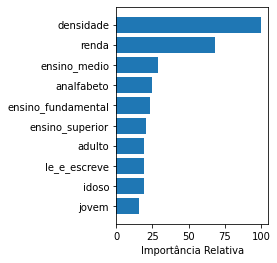

In [ ]:
array_n = df.values
X = array_n[:,0:10]
Y = array_n[:,10]
select_features(SelectKBest, chi2)

Análise para o 2o turno

Analyzing <class 'sklearn.feature_selection._univariate_selection.SelectKBest'>(<function chi2 at 0x7f6ae327abf8>)
Features sorted by their scores:
[(14.8438, 'candidato'), (1.36, 'ensino_fundamental'), (1.3297, 'analfabeto'), (1.2062, 'ensino_medio'), (1.173, 'renda'), (1.0399, 'le_e_escreve'), (0.9967, 'adulto'), (0.9759, 'idoso'), (0.8849, 'jovem'), (0.4298, 'ensino_superior'), (0.1306, 'densidade')]



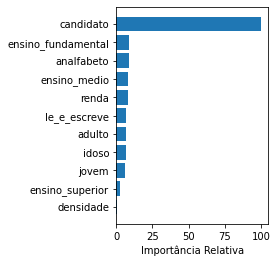

In [ ]:
array_n = df.values
X = array_n[:,0:11]
Y = array_n[:,11]
select_features(SelectKBest, chi2)

## Fontes

* https://resultados.tse.jus.br/oficial
* https://www.tse.jus.br/eleicoes/estatisticas/repositorio-de-dados-eleitorais-1/repositorio-de-dados-eleitorais
* http://www.sedecti.am.gov.br/indicadores-mapa/